In [2]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=fe757153daacf8627f13385cb3715e736e3a00df5b9b2ca95d8f2ce3fba95c8e
  Stored in directory: c:\users\rbw19\appdata\local\pip\cache\wheels\6d\4e\9e\a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built MiniSom


In [35]:
from minisom import MiniSom
import numpy as np
import pandas as pd

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'], usecols=[0, 5 ,2], 
                   sep='\t+', engine='python')

data

,area,compactness,asymmetry_coefficient
0,15.26,0.8710,2.221
1,14.88,0.8811,1.018
2,14.29,0.9050,2.699
3,13.84,0.8955,2.259
4,16.14,0.9034,1.355
...,...,...,...
205,12.19,0.8783,3.631
206,11.23,0.8511,4.325
207,13.20,0.8883,8.315
208,11.84,0.8521,3.598


In [36]:
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

In [37]:
data.shape

(210, 3)

In [ ]:
som=MiniSom()

In [38]:
# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.1639699324233799


In [44]:
test_data=data[15]
cluster_id=som.winner(test_data)[1]
print(cluster_id)
som.get_weights() #returns the coordinates of the nodes

2


array([[[-0.58841661, -0.49266738, -0.14170577],
        [-0.34454836,  0.25717928, -1.16287038],
        [ 1.00825154,  0.35850836,  0.34493772]]])

In [34]:
som

TypeError: object of type 'method' has no len()

In [19]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
print(winner_coordinates)
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
# cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 1 2 2 2 1 2 1 2 2 1 1 2 2 1 2 2 2 2 2 2 1 2 2 1 2 1 1 2 2 2
  2 0 1 1 2 2 2 1 1 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 2 2 0 1 1 1 1
  1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1]]


In [10]:
cluster_index

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

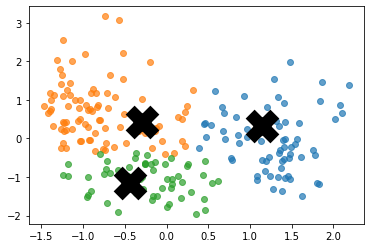

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')